## Numbers Dataset

We have a dataset of handwritten digits from 0 to 9

We need some library to read the images, I've chosen the pillow library which comes with Anaconda, if you need to 

pip install Pillow

should install it for you

In [316]:
import numpy as np
import glob
import matplotlib.pyplot as plt
from PIL import Image

In [317]:
##Printing Examples
def printexamples(X):
    examples_per_class = 10
    number_of_classes = 10
    pos = 0
    for cls in range(number_of_classes):
        idxs = range(pos,pos+500)
        idxs = np.random.choice(idxs, examples_per_class, replace=False)
        for i, idx in enumerate(idxs):
            plt.subplot(examples_per_class, number_of_classes, i * number_of_classes + cls + 1)
            plt.imshow(X[idx].reshape(20,20).astype('uint8'), cmap='gray')
            plt.axis('off')
            if i == 0:
                plt.title(str(cls))
        pos = pos+500
    plt.show()

In [318]:
#create the file list
filelist = glob.glob('digits/data/*/*.png')
filelist.sort()

In [319]:
filelist[100]

'digits/data/0/img_0_19.png'

In [320]:
X = np.array([np.array(Image.open(filename)) for filename in filelist])

In [321]:
y = np.array([(filename.split('/')[2]) for filename in filelist],dtype=int)

In [322]:
X = X.reshape(X.shape[0],-1)

In [323]:
print("X shape :",X.shape)
print("y shape :",y.shape)

X shape : (5000, 400)
y shape : (5000,)


In [324]:
# Display y to ensure it looks like array
print(y)

[0 0 0 ... 9 9 9]


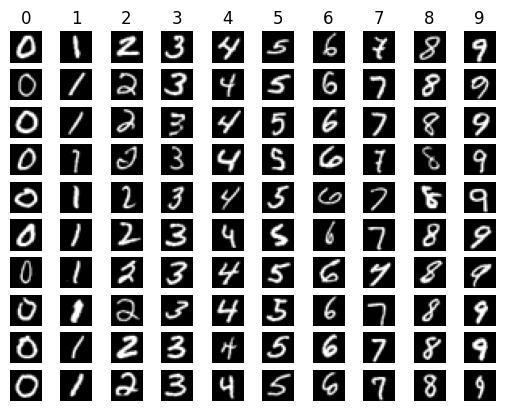

In [325]:
printexamples(X)

In [326]:
X = X/255.0 #normalize the data

In [327]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("X_train shape :",X_train.shape)
print("X_test shape :",X_test.shape)
print("y_train shape :",y_train.shape)
print("y_test shape :",y_test.shape)

X_train shape : (4000, 400)
X_test shape : (1000, 400)
y_train shape : (4000,)
y_test shape : (1000,)


# K-neaarest neighbour example

In [328]:

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Create the k-NN model with k=5
knn = KNeighborsClassifier(n_neighbors=5)

# Train the model on the training set
knn.fit(X_train, y_train)

# Score the model on the training and test sets
train_score = knn.score(X_train, y_train)
test_score = knn.score(X_test, y_test)

print("Training score:", train_score)
print("Test score:", test_score)


Training score: 0.96275
Test score: 0.945


In [329]:
# Predict on the test set
y_pred = knn.predict(X_test)

# Count incorrect predictions
incorrect_predictions = np.sum(y_pred != y_test)
print("Number of incorrect predictions on the test set:", incorrect_predictions)

Number of incorrect predictions on the test set: 55


In [330]:
# Print classification report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98       111
           1       0.93      1.00      0.96       105
           2       0.97      0.93      0.95       105
           3       0.94      0.94      0.94        85
           4       0.92      0.89      0.91        94
           5       0.99      0.94      0.96        98
           6       0.94      0.97      0.95        98
           7       0.92      0.93      0.92       112
           8       1.00      0.94      0.97        81
           9       0.89      0.90      0.90       111

    accuracy                           0.94      1000
   macro avg       0.95      0.94      0.95      1000
weighted avg       0.95      0.94      0.94      1000



Confusion Matrix:
 [[111   0   0   0   0   0   0   0   0   0]
 [  0 105   0   0   0   0   0   0   0   0]
 [  0   1  98   0   0   0   1   5   0   0]
 [  0   0   1  80   0   0   1   1   0   2]
 [  0   2   1   0  84   0   1   0   0   6]
 [  0   1   0   2   2  92   1   0   0   0]
 [  3   0   0   0   0   0  95   0   0   0]
 [  0   3   1   0   1   0   0 104   0   3]
 [  1   0   0   1   0   1   1   0  76   1]
 [  0   1   0   2   4   0   1   3   0 100]]


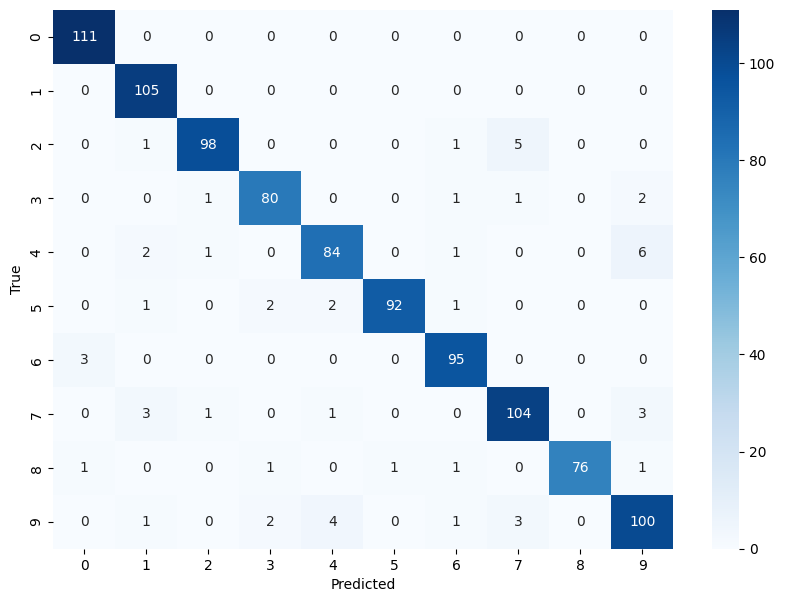

In [331]:
# Print confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Analyze the confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [332]:
# Implement k-Fold Cross Validation to find the best k
k_values = range(1, 21)
cv_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())

# Find the best k
best_k = k_values[np.argmax(cv_scores)]
print("Best k:", best_k)

# Train a model using the training set with the best k
knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X_train, y_train)

# Score the model on the test set
final_test_score = knn_best.score(X_test, y_test)
print("Final test score with best k:", final_test_score)

# Print classification report for the best k model
y_pred_best = knn_best.predict(X_test)
report_best = classification_report(y_test, y_pred_best)
print("Classification Report for best k:\n", report_best)

Best k: 1
Final test score with best k: 0.952
Classification Report for best k:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97       111
           1       0.95      0.98      0.97       105
           2       0.99      0.93      0.96       105
           3       0.96      0.94      0.95        85
           4       0.96      0.94      0.95        94
           5       0.95      0.93      0.94        98
           6       0.96      0.96      0.96        98
           7       0.94      0.95      0.94       112
           8       0.96      0.95      0.96        81
           9       0.91      0.94      0.92       111

    accuracy                           0.95      1000
   macro avg       0.95      0.95      0.95      1000
weighted avg       0.95      0.95      0.95      1000



# Logistic Regresion model

Training score: 0.96725
Test score: 0.918
Number of incorrect predictions on the test set: 82
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99       111
           1       0.92      0.98      0.95       105
           2       0.90      0.85      0.87       105
           3       0.91      0.91      0.91        85
           4       0.88      0.85      0.86        94
           5       0.90      0.93      0.91        98
           6       0.95      0.94      0.94        98
           7       0.95      0.89      0.92       112
           8       0.88      0.90      0.89        81
           9       0.90      0.93      0.91       111

    accuracy                           0.92      1000
   macro avg       0.92      0.92      0.92      1000
weighted avg       0.92      0.92      0.92      1000

Confusion Matrix:
 [[110   0   0   0   0   0   0   0   0   1]
 [  0 103   0   0   0   0   0   0   2   0]
 [  0   2  89   3 

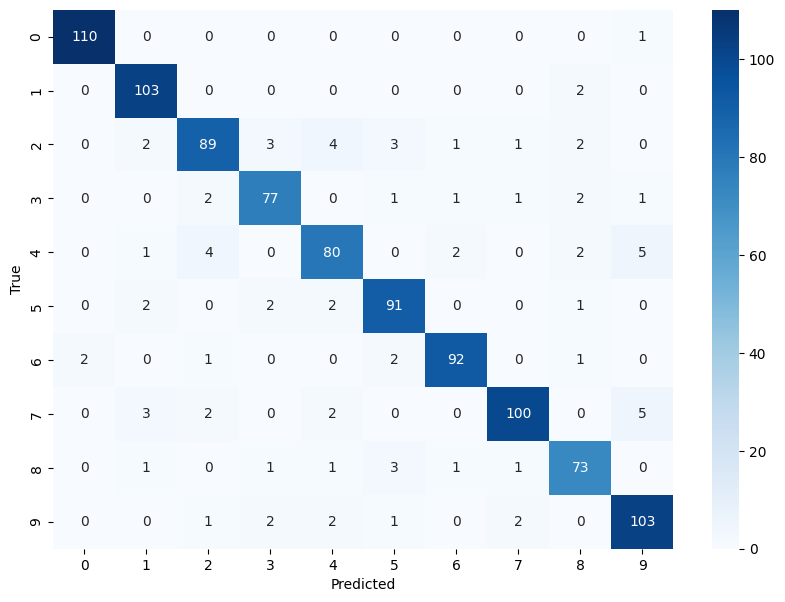

Cross-validation scores: [0.8925  0.90625 0.90125 0.89875 0.9075 ]
Mean cross-validation score: 0.9012500000000001
Final test score with best hyperparameters: 0.918
Classification Report for best model:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99       111
           1       0.92      0.98      0.95       105
           2       0.90      0.85      0.87       105
           3       0.91      0.91      0.91        85
           4       0.88      0.85      0.86        94
           5       0.90      0.93      0.91        98
           6       0.95      0.94      0.94        98
           7       0.95      0.89      0.92       112
           8       0.88      0.90      0.89        81
           9       0.90      0.93      0.91       111

    accuracy                           0.92      1000
   macro avg       0.92      0.92      0.92      1000
weighted avg       0.92      0.92      0.92      1000



In [333]:
# Create the Logistic Regression model
from sklearn.linear_model import LogisticRegression


log_reg = LogisticRegression(max_iter=1000)

# Train the model on the training set
log_reg.fit(X_train, y_train)

# Score the model on the training and test sets
train_score = log_reg.score(X_train, y_train)
test_score = log_reg.score(X_test, y_test)

print("Training score:", train_score)
print("Test score:", test_score)

# Predict on the test set
y_pred = log_reg.predict(X_test)

# Count incorrect predictions
incorrect_predictions = np.sum(y_pred != y_test)
print("Number of incorrect predictions on the test set:", incorrect_predictions)

# Print classification report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

# Print confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Implement k-Fold Cross Validation to find the best hyperparameters
cv_scores = cross_val_score(log_reg, X_train, y_train, cv=5, scoring='accuracy')

# Print cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())

# Train a model using the training set with the best hyperparameters
log_reg_best = LogisticRegression(max_iter=1000)
log_reg_best.fit(X_train, y_train)

# Score the model on the test set
final_test_score = log_reg_best.score(X_test, y_test)
print("Final test score with best hyperparameters:", final_test_score)

# Print classification report for the best model
y_pred_best = log_reg_best.predict(X_test)
report_best = classification_report(y_test, y_pred_best)
print("Classification Report for best model:\n", report_best)

The results are good but k folds remains the most superior in terms of being closer to 1 